### Imports

Starting off! Let's import some libraries to ingest the csv file. 

In [107]:

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Ingest

I converted the datetime column into a datetime object and tried to see how the magnitude of the earthquakes change over time. It seems like the magnitude does not follow a visible trend, which is something to keep in mind.

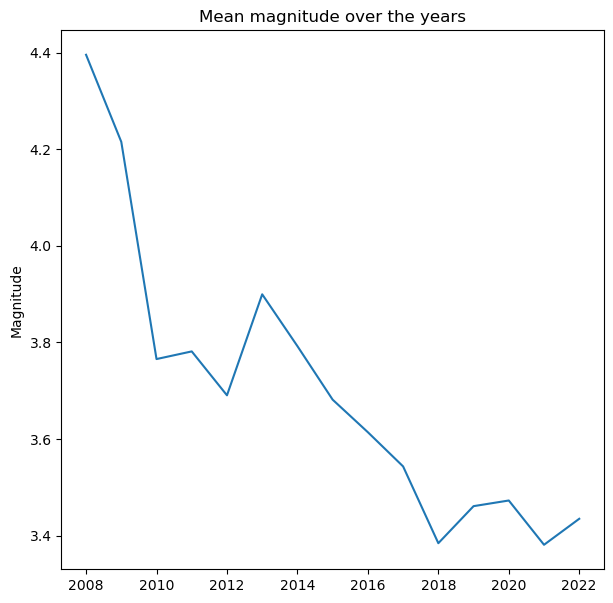

In [74]:
df = pd.read_csv('data.csv',)
df['date_time'] = df.date.str.cat(df.time.copy(), sep =" ")
df['date_time'] = pd.to_datetime(df.date_time)

df['year'] = df.date_time.dt.year
df = df.set_index(df.date_time)
df= df.sort_index()


#How did the magnitude change over the years?
fig, ax = plt.subplots(figsize=(7,7))
gb = df.groupby('year')['magnitude'].mean().reset_index()
ax.plot(gb.year,gb.magnitude,)
ax.set_title('Mean magnitude over the years')
ax.set_ylabel("Magnitude");


In [75]:
df.head()

,date,time,latitude,longitude,depth,magnitude,date_time,year
date_time,,,,,,,,
2008-11-01 00:31:25,2008-11-01,00:31:25,-0.60,98.89553,20.0,2.99,2008-11-01 00:31:25,2008
2008-11-01 01:34:29,2008-11-01,01:34:29,-6.61,129.38722,30.1,5.51,2008-11-01 01:34:29,2008
2008-11-01 01:38:14,2008-11-01,01:38:14,-3.65,127.99068,5.0,3.54,2008-11-01 01:38:14,2008
2008-11-01 02:20:05,2008-11-01,02:20:05,-4.20,128.09700,5.0,2.42,2008-11-01 02:20:05,2008
2008-11-01 02:32:18,2008-11-01,02:32:18,-4.09,128.20047,10.0,2.41,2008-11-01 02:32:18,2008


In [76]:
data = df.copy()
data = data.drop(columns  = ['date_time'])
data

,date,time,latitude,longitude,depth,magnitude,year
date_time,,,,,,,
2008-11-01 00:31:25,2008-11-01,00:31:25,-0.60,98.89553,20.0,2.99,2008
2008-11-01 01:34:29,2008-11-01,01:34:29,-6.61,129.38722,30.1,5.51,2008
2008-11-01 01:38:14,2008-11-01,01:38:14,-3.65,127.99068,5.0,3.54,2008
2008-11-01 02:20:05,2008-11-01,02:20:05,-4.20,128.09700,5.0,2.42,2008
2008-11-01 02:32:18,2008-11-01,02:32:18,-4.09,128.20047,10.0,2.41,2008
...,...,...,...,...,...,...,...
2022-09-26 22:00:50,2022-09-26,22:00:50,-8.15,121.35150,10.0,3.41,2022
2022-09-26 22:08:59,2022-09-26,22:08:59,0.97,125.63014,12.1,3.29,2022
2022-09-26 22:11:43,2022-09-26,22:11:43,-8.27,116.71154,10.0,3.38,2022


### Date-time features

For the date time features, I decided to process it into time-stamps object and use it as a feature for the model. 

In [77]:
import datetime
import time

timestamp = []
for d, t in zip(data['date'], data['time']):
    try:
        ts = datetime.datetime.strptime(d+' '+t, '%Y-%m-%d %H:%M:%S')
        timestamp.append(time.mktime(ts.timetuple()))
    except ValueError:
       
        timestamp.append('ValueError')
timeStamp = pd.Series(timestamp)

data['timestamp'] = timeStamp.values
final_data = data.drop(columns = ['date', 'time', ])
final_data = final_data[final_data.timestamp != 'ValueError']
final_data.head()

,latitude,longitude,depth,magnitude,year,timestamp
date_time,,,,,,
2008-11-01 00:31:25,-0.60,98.89553,20.0,2.99,2008,1.225471e+09
2008-11-01 01:34:29,-6.61,129.38722,30.1,5.51,2008,1.225474e+09
2008-11-01 01:38:14,-3.65,127.99068,5.0,3.54,2008,1.225475e+09
2008-11-01 02:20:05,-4.20,128.09700,5.0,2.42,2008,1.225477e+09
2008-11-01 02:32:18,-4.09,128.20047,10.0,2.41,2008,1.225478e+09


## Preprocessing

I decided to scale the latitude and longitude using `MinMaxScaler`, scaling the latitude and longitude ended up being beneficial to the model performance.

In [109]:
from sklearn import preprocessing

scale_lat = preprocessing.MinMaxScaler(feature_range = (-1, 1))
scale_long = preprocessing.MinMaxScaler(feature_range = (-1, 1))
scaled_lat =scale_lat.fit_transform(final_data.latitude.values.reshape(-1,1))
scaled_long = scale_long.fit_transform(final_data.longitude.values.reshape(-1,1))


final_data['latitude'] = scaled_lat
final_data['longitude'] = scaled_long
feed = final_data.copy()

feed.head()

,latitude,longitude,depth,magnitude,year,timestamp
date_time,,,,,,
2008-11-01 00:31:25,0.223529,-0.830656,20.0,2.99,2008,1.225471e+09
2008-11-01 01:34:29,-0.483529,0.495671,30.1,5.51,2008,1.225474e+09
2008-11-01 01:38:14,-0.135294,0.434924,5.0,3.54,2008,1.225475e+09
2008-11-01 02:20:05,-0.200000,0.439549,5.0,2.42,2008,1.225477e+09
2008-11-01 02:32:18,-0.187059,0.444050,10.0,2.41,2008,1.225478e+09


Choosing a splitting year. For now I am going to use the year 2022 as the validation set for seeing the model performance of the initial model and the final model.

In [79]:
splitting_year = 2021
features = ['latitude', 'longitude', 'timestamp']
target = ['magnitude']

train_splitted = feed[feed.year <= splitting_year].copy()
val_splitted = feed[feed.year > splitting_year].copy()


In [108]:
# Train-test split by year

X_train = train_splitted[features]
y_train = train_splitted[target]


X_val = val_splitted[features]
y_test = val_splitted[target]


In [95]:
#Using XGBoost for our model.
import xgboost as xgb
from sklearn import metrics
xgb.set_config(verbosity =0)

xg_reg = xgb.XGBRegressor(random_state =42)
xg_reg.fit(X_train,y_train)
y_pred_xg = xg_reg.predict(X_val)
print(metrics.mean_squared_error(y_pred_xg,y_test))

/home/rafipangestu/anaconda3/envs/datsci/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


0.4201631447439626


The `MSE` is fairly good for an initial model, but `WMAPE/WAPE` is more often used for time series models. This is the metric that I will use for tuning the model.

In [96]:
def wmape(y_true, y_pred):
    return np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_true))


wmape_xg = wmape(y_test['magnitude'].values.reshape(-1,1), y_pred_xg.reshape(-1,1))

#How did our initial model perform?
print(f'XGboost WMAPE: {wmape_xg}')


XGboost WMAPE: 0.14632258778130627


### Optuna

`Optuna` is a well-known library for Bayesian optimization. The idea behind it is that it tries to spend more time on hyperparameter values that maximizes the intended metric. `WMAPE` is going to be the metric that I am asking `Optuna` to minimize (Since a lower `WMAPE` mean a more accurate estimate).

To use Optuna, there is an objective function that is needed to specify. This tells `Optuna` what to minimize. Afterwards, trials are done 25 times. The hold-out validation set are made using `TimeSeriesSplit` from `scikit-learn`. 

In [98]:
from sklearn import model_selection
import optuna


def objective(trial, x=feed[features], y=feed[target]):
    
    tss = model_selection.TimeSeriesSplit(n_splits = 5, test_size  = 1000, gap =0)

    param = {
        "random_state" : 42,
        "silent": 1,
        "n_estimators": trial.suggest_int("n_estimators", 50, 1500),
        "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
        "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
        'max_depth': trial.suggest_int('max_depth', 1,10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.01,0.012,0.014,0.016,0.018, 0.02,0.1,0.14,0.3]),
        
    } 
    wmapes= []
    model = xgb.XGBRegressor(**param)
    for train_idx, val_idx in tss.split(df):
        x_train = x.iloc[train_idx]
        y_train = y.iloc[train_idx]

        x_test = x.iloc[val_idx]
        y_test = y.iloc[val_idx]

        model.fit(x_train, y_train)
        preds = model.predict(x_test)
        wmape_current = wmape(y_test['magnitude'].values.reshape(-1,1), preds.reshape(-1,1))
        wmapes.append(wmape_current)
    return np.mean(wmapes)



In [99]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=25)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2022-10-17 15:39:03,593] A new study created in memory with name: no-name-a752f1ab-6a02-40e7-b0a5-bbaac588fed2
/tmp/ipykernel_20455/2381965263.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_20455/2381965263.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/home/rafipangestu/anaconda3/envs/datsci/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinst

Number of finished trials: 25
Best trial: {'n_estimators': 324, 'lambda': 0.00010694400029169138, 'alpha': 1.7045155655240847e-07, 'max_depth': 10, 'min_child_weight': 250, 'subsample': 0.7, 'learning_rate': 0.14}


In [101]:
#Copying the best params into a dictionary and fitting the model with it.
params = {'n_estimators': 324, 'lambda': 0.00010694400029169138, 
'alpha': 1.7045155655240847e-07, 'max_depth': 10, 
'min_child_weight': 250, 'subsample': 0.7, 
'learning_rate': 0.14}

final_model  = xgb.XGBRegressor(**params, silent = 1, random_state = 42)

final_model.fit(X_train,y_train)
y_pred_fm = final_model.predict(X_val)

#How's the RMSE?
print(metrics.mean_squared_error(y_pred_fm,y_test))

/home/rafipangestu/anaconda3/envs/datsci/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


0.3763221035748761


In [103]:

#Hows the WMAPE?
wmape_xg = wmape(y_test['magnitude'].values.reshape(-1,1), y_pred_fm.reshape(-1,1))
print(f'XGboost WMAPE: {wmape_xg}')

XGboost WMAPE: 0.13962070387028042


It is shown that `Optuna` did manage to reduce the `WMAPE`. I do have to admit that the 13.68% WMAPE is not very ideal, I would have wanted to see something less than 10%. But judging how the average magnitude of the earthquakes don't follow a predictable trend, I am quite satisfied with the performance of the model. What is left to do is to load the model into a pickle file.

In [106]:
import pickle 

pickle.dump(final_model, open('final_model.pkl', 'wb'))